In [2]:
# !pip install pandas pyarrow
# !pip install dask
# !pip install matplotlib
# !python3 -m pip install tensorflow
# # Verify the installation:
# !python3 -c "import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
# !pip install numpy
# !pip install scipy
# !pip3 install torch torchvision torchaudio
!pip install dotmap


In [1]:
import pandas as pd
import os
import io
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, Image as IPImage
import waymo_utils as v2
import numpy as np
from dataloader import WaymoDataset
from torchvision.transforms import ToTensor, Compose
from general_utils import timeit








/opt/homebrew/Caskroom/miniforge/base/envs/cvenv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
def get_file(filetype):
    FILE_PATH=f"/Users/tjjefferson/cv/data/{filetype}/"
    return FILE_PATH





In [3]:
def get_transform(train):
    transform = [ToTensor()]
    return Compose(transform)

waymo = WaymoDataset(get_file("cam"), get_file("box"), transform=get_transform(train=True))


In [7]:
print(timeit)

: Dataset getitem 0.3



In [5]:
len(waymo)

4343

In [6]:
timeit.reset()
waymo[500]

(tensor([[[0.5294, 0.3412, 0.2275,  ..., 0.5412, 0.5412, 0.5451],
          [0.5333, 0.3451, 0.2235,  ..., 0.5373, 0.5373, 0.5412],
          [0.5569, 0.3647, 0.2235,  ..., 0.5373, 0.5373, 0.5451],
          ...,
          [0.0706, 0.0667, 0.0588,  ..., 0.4078, 0.4118, 0.4118],
          [0.0667, 0.0667, 0.0706,  ..., 0.3882, 0.3961, 0.4000],
          [0.0588, 0.0706, 0.0784,  ..., 0.3804, 0.3922, 0.3961]],
 
         [[0.5569, 0.3608, 0.2353,  ..., 0.5608, 0.5608, 0.5647],
          [0.5608, 0.3647, 0.2314,  ..., 0.5569, 0.5569, 0.5608],
          [0.5843, 0.3843, 0.2314,  ..., 0.5569, 0.5569, 0.5647],
          ...,
          [0.1176, 0.1137, 0.1098,  ..., 0.4039, 0.4078, 0.4078],
          [0.1216, 0.1216, 0.1294,  ..., 0.3843, 0.3922, 0.3961],
          [0.1137, 0.1294, 0.1373,  ..., 0.3765, 0.3882, 0.3922]],
 
         [[0.5255, 0.3333, 0.2235,  ..., 0.6471, 0.6392, 0.6431],
          [0.5294, 0.3373, 0.2196,  ..., 0.6431, 0.6353, 0.6392],
          [0.5529, 0.3569, 0.2196,  ...,

In [14]:
print(timeit)

: Dataset getitem 0.3



In [4]:
# Get the file paths for the "cam" and "box" folders
cam_folder = get_file("cam")
box_folder = get_file("box")

print(cam_folder)

# Get the list of parquet files in the "cam" folder
cam_files = [file for file in os.listdir(cam_folder) if file.endswith(".parquet")]

# Initialize an empty list to store the merged dataframes
merged_dfs = []
df_box, df_cam = None, None
# Iterate over the parquet files in the "cam" folder
for cam_file in cam_files:
    # Get the corresponding box file name
    box_file = cam_file.replace("cam", "box")
    
    # Read the cam and box dataframes
    df_cam = pd.read_parquet(os.path.join(cam_folder, cam_file))
    df_box = pd.read_parquet(os.path.join(box_folder, box_file))
    # Merge the cam and box dataframes using the v2.merge function
    
    merged_df = v2.merge(df_cam, df_box, right_group=True)
    
    # Append the merged dataframe to the list
    merged_dfs.append(merged_df)

# Concatenate all the merged dataframes into a single dataframe
merged_df = pd.concat(merged_dfs, axis=0)
# print(len(merged_df))

df_cam.head(20)
# merged_df.head()




/Users/tjjefferson/cv/data/cam/


,key.segment_context_name,key.frame_timestamp_micros,key.camera_name,[CameraImageComponent].image,[CameraImageComponent].pose.transform,[CameraImageComponent].velocity.linear_velocity.x,[CameraImageComponent].velocity.linear_velocity.y,[CameraImageComponent].velocity.linear_velocity.z,[CameraImageComponent].velocity.angular_velocity.x,[CameraImageComponent].velocity.angular_velocity.y,[CameraImageComponent].velocity.angular_velocity.z,[CameraImageComponent].pose_timestamp,[CameraImageComponent].rolling_shutter_params.shutter,[CameraImageComponent].rolling_shutter_params.camera_trigger_time,[CameraImageComponent].rolling_shutter_params.camera_readout_done_time
index,,,,,,,,,,,,,,,
10017090168044687777_6380_000_6400_000;1550083467346370,10017090168044687777_6380_000_6400_000,1550083467346370,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9482868309813268, -0.23495154098744556, 0.2...",5.765131,1.371270,-1.329111,-0.010016,-0.014922,0.105475,1.550083e+09,0.009992,1.550083e+09,1.550083e+09
10017090168044687777_6380_000_6400_000;1550083467346370,10017090168044687777_6380_000_6400_000,1550083467346370,2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9487161220058431, -0.23293730459068215, 0.2...",5.757565,1.392409,-1.327417,0.003401,-0.011684,0.099375,1.550083e+09,0.009992,1.550083e+09,1.550083e+09
10017090168044687777_6380_000_6400_000;1550083467346370,10017090168044687777_6380_000_6400_000,1550083467346370,4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9489391880311817, -0.23197163266142976, 0.2...",5.762588,1.389895,-1.330847,0.005329,-0.012516,0.098726,1.550083e+09,0.009992,1.550083e+09,1.550083e+09
10017090168044687777_6380_000_6400_000;1550083467346370,10017090168044687777_6380_000_6400_000,1550083467346370,3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9480805733268344, -0.23597955012227076, 0.2...",5.764107,1.374694,-1.330062,-0.014756,-0.016971,0.102667,1.550083e+09,0.009992,1.550083e+09,1.550083e+09
10017090168044687777_6380_000_6400_000;1550083467346370,10017090168044687777_6380_000_6400_000,1550083467346370,5,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9479157488563362, -0.23691579285250022, 0.2...",5.758528,1.381121,-1.324764,-0.016695,-0.015307,0.097743,1.550083e+09,0.009992,1.550083e+09,1.550083e+09
10017090168044687777_6380_000_6400_000;1550083467446163,10017090168044687777_6380_000_6400_000,1550083467446163,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9460454274905595, -0.2446805774969256, 0.21...",5.726245,1.409312,-1.290130,-0.007733,0.002890,0.098458,1.550083e+09,0.009992,1.550083e+09,1.550083e+09
10017090168044687777_6380_000_6400_000;1550083467446163,10017090168044687777_6380_000_6400_000,1550083467446163,2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9465555679557249, -0.24271678155288484, 0.2...",5.731619,1.410772,-1.297965,0.003404,-0.000025,0.098590,1.550083e+09,0.009992,1.550083e+09,1.550083e+09
10017090168044687777_6380_000_6400_000;1550083467446163,10017090168044687777_6380_000_6400_000,1550083467446163,4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9467860596729434, -0.24184785502691403, 0.2...",5.723523,1.410536,-1.292132,0.000851,0.002303,0.091824,1.550083e+09,0.009992,1.550083e+09,1.550083e+09
10017090168044687777_6380_000_6400_000;1550083467446163,10017090168044687777_6380_000_6400_000,1550083467446163,3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.9458155985361077, -0.24547451093942, 0.2125...",5.713543,1.426227,-1.281765,-0.007982,0.007286,0.089601,1.550083e+09,0.009992,1.550083e+09,1.550083e+09


In [5]:
merged_df.head()

,key.segment_context_name,key.frame_timestamp_micros,key.camera_name,[CameraImageComponent].image,[CameraImageComponent].pose.transform,[CameraImageComponent].velocity.linear_velocity.x,[CameraImageComponent].velocity.linear_velocity.y,[CameraImageComponent].velocity.linear_velocity.z,[CameraImageComponent].velocity.angular_velocity.x,[CameraImageComponent].velocity.angular_velocity.y,...,[CameraImageComponent].rolling_shutter_params.camera_trigger_time,[CameraImageComponent].rolling_shutter_params.camera_readout_done_time,key.camera_object_id,[CameraBoxComponent].box.center.x,[CameraBoxComponent].box.center.y,[CameraBoxComponent].box.size.x,[CameraBoxComponent].box.size.y,[CameraBoxComponent].type,[CameraBoxComponent].difficulty_level.detection,[CameraBoxComponent].difficulty_level.tracking
0,10072231702153043603_5725_000_5745_000,1521741642118166,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[-0.9998836988222458, 0.015244892837527977, -0...",-12.740756,-0.210031,0.001821,0.007851,0.006140,...,1.521742e+09,1.521742e+09,"[0f8f7110-d90c-45df-82ab-bf4e3ed30337, 3d524e3...","[880.43646, 955.5956699999999, 973.28019, 1434...","[663.8010899999999, 663.8010899999999, 665.064...","[17.68452000000002, 25.263599999999997, 12.631...","[13.894980000000032, 11.368619999999964, 11.36...","[1, 1, 1, 1, 1, 1, 1]","[2.0, 2.0, 2.0, nan, nan, 2.0, nan]","[2.0, 2.0, 2.0, nan, nan, 2.0, nan]"
1,10072231702153043603_5725_000_5745_000,1521741642118166,4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[-0.9998624144648925, 0.016586176779803386, -0...",-12.700705,-0.224058,-0.005783,0.012161,-0.000162,...,1.521742e+09,1.521742e+09,[9657c9d6-74cd-4e98-8d28-41d9782ae831],[493.27179],[298.74207],[160.42385999999993],[102.31757999999996],[1],[nan],[nan]
2,10072231702153043603_5725_000_5745_000,1521741642218262,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[-0.999936630219526, 0.011219416755654386, -0....",-12.832071,-0.170928,-0.019053,0.011655,-0.002873,...,1.521742e+09,1.521742e+09,"[0f8f7110-d90c-45df-82ab-bf4e3ed30337, 3d524e3...","[870.96261, 948.01659, 966.9642899999999, 1431...","[661.2747299999999, 665.0642699999999, 663.801...","[18.947700000000054, 26.52678000000003, 12.631...","[12.631799999999998, 12.631799999999998, 11.36...","[1, 1, 1, 1, 1, 1, 1]","[2.0, 2.0, 2.0, nan, nan, 2.0, nan]","[2.0, 2.0, 2.0, nan, nan, 2.0, nan]"
3,10072231702153043603_5725_000_5745_000,1521741642218262,4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[-0.9999241464237247, 0.012274565626373368, -0...",-12.794783,-0.184195,-0.008695,0.014544,0.004886,...,1.521742e+09,1.521742e+09,[9657c9d6-74cd-4e98-8d28-41d9782ae831],[399.79647],[300.00525],[173.05566],[102.31758000000002],[1],[nan],[nan]
4,10072231702153043603_5725_000_5745_000,1521741642318363,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[-0.9999688042292593, 0.007860035675893605, 0....",-12.991727,-0.133357,-0.031544,0.005771,-0.026461,...,1.521742e+09,1.521742e+09,"[0f8f7110-d90c-45df-82ab-bf4e3ed30337, 3d524e3...","[863.38353, 940.43751, 959.3852099999999, 1433...","[667.5906299999999, 667.59063, 667.59063, 682....","[17.68452000000002, 26.52678000000003, 12.6317...","[12.631799999999998, 11.368619999999964, 11.36...","[1, 1, 1, 1, 1, 1, 1]","[2.0, 2.0, 2.0, nan, nan, 2.0, nan]","[2.0, 2.0, 2.0, nan, nan, 2.0, nan]"


In [11]:
print(len(merged_df))
merged_df["[CameraBoxComponent].type"].head()
# concat all lists in the column
all_lists_concat = []
for i in range(len(merged_df)):
    all_lists_concat += merged_df.iloc[i]["[CameraBoxComponent].type"]
# get unique values
unique_values = set(all_lists_concat)
unique_values


4343


{1, 2, 4}

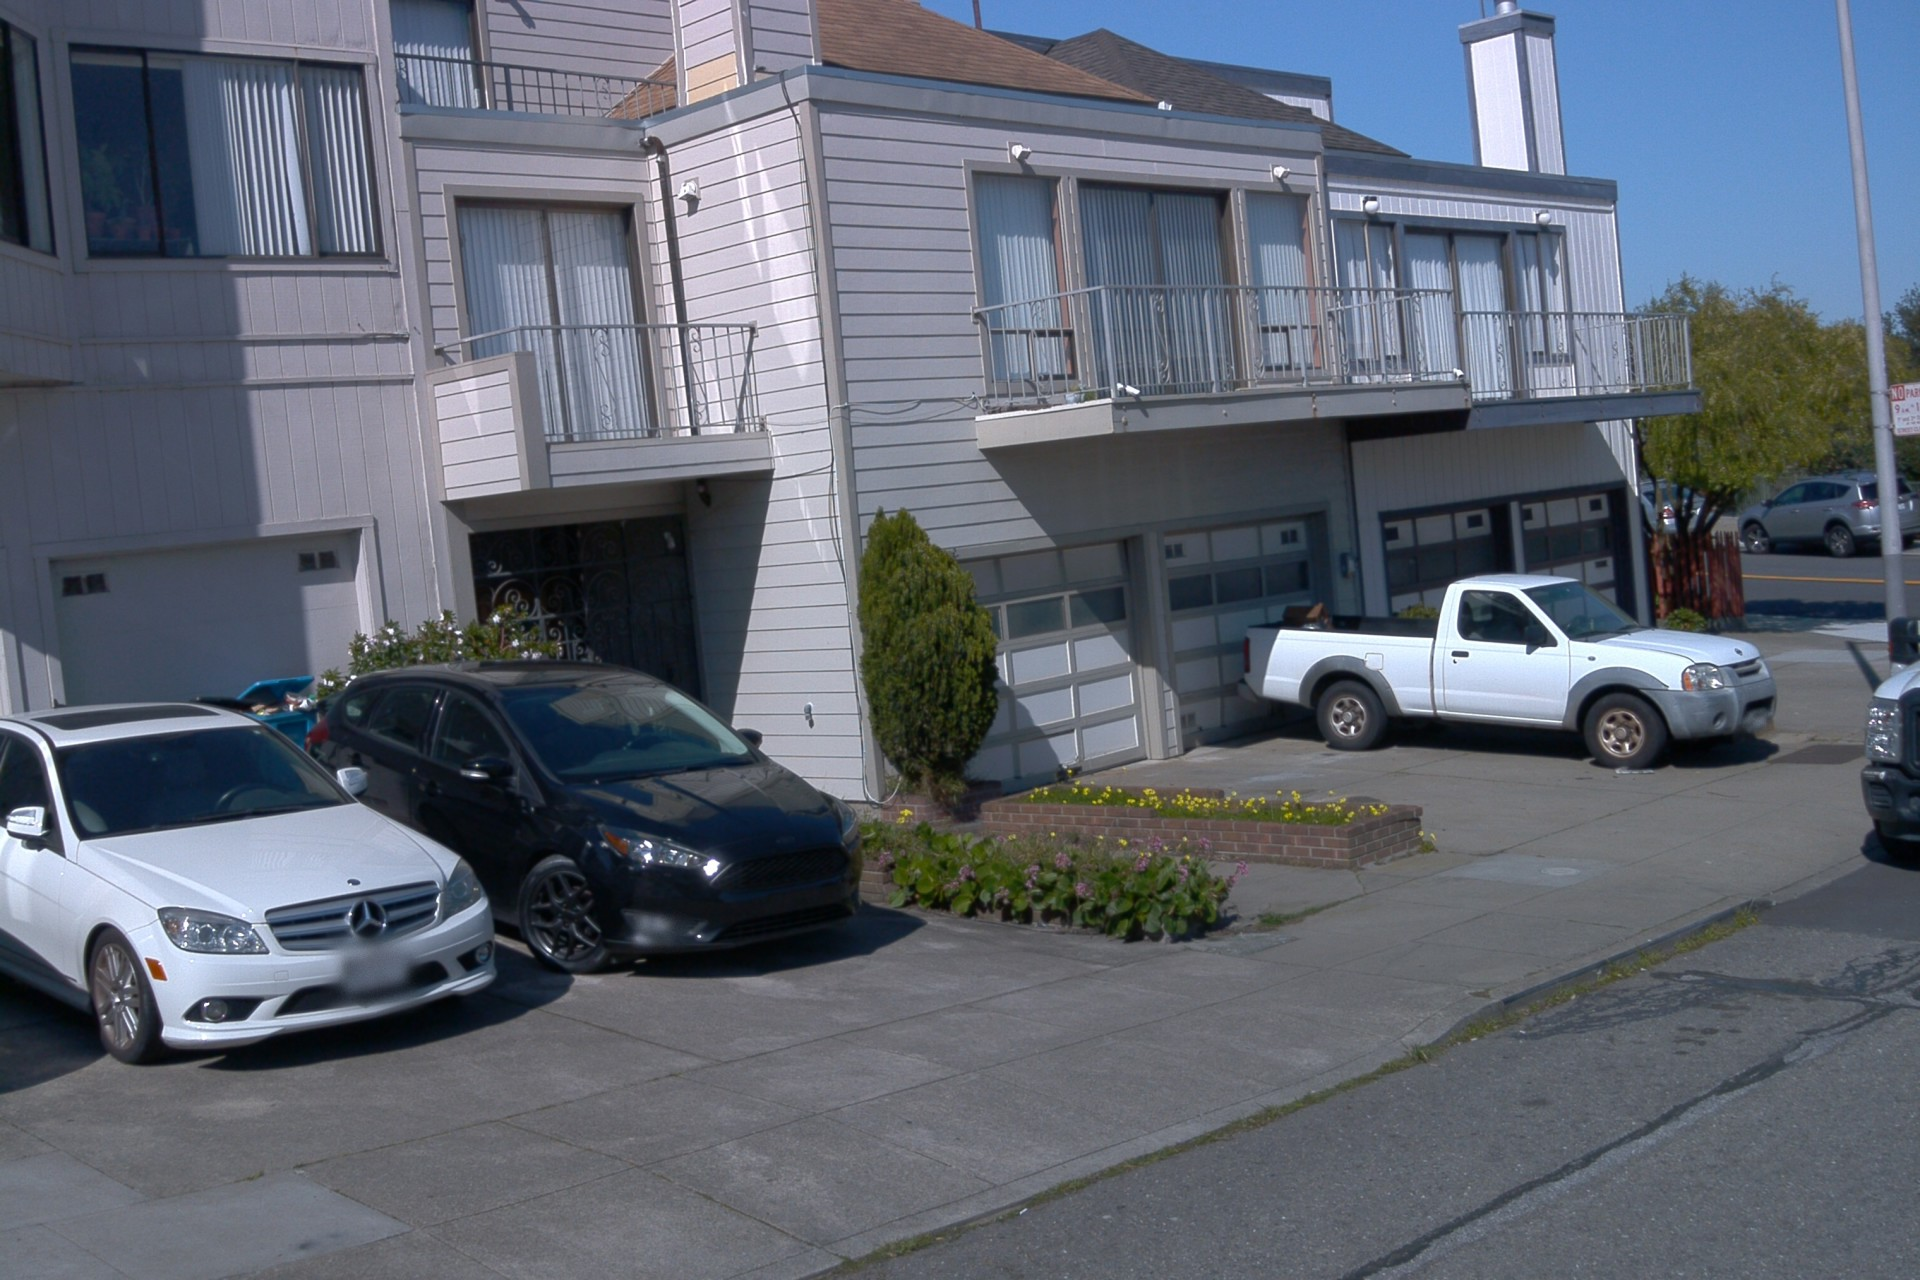

In [12]:
image_id = 1000

encoded_data = merged_df.iloc[image_id]["[CameraImageComponent].image"]
image = Image.open(io.BytesIO(encoded_data))

# Display the image inline in the Jupyter Notebook
display(image)

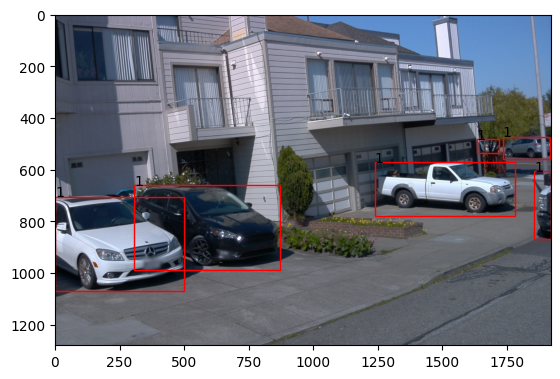

In [13]:

x = merged_df.iloc[image_id]["[CameraBoxComponent].box.center.x"]
x

# Get the image data
encoded_data = merged_df.iloc[image_id]["[CameraImageComponent].image"]
image = Image.open(io.BytesIO(encoded_data))

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Get the bounding box coordinates
x = merged_df.iloc[image_id]["[CameraBoxComponent].box.center.x"]
y = merged_df.iloc[image_id]["[CameraBoxComponent].box.center.y"]
width = merged_df.iloc[image_id]["[CameraBoxComponent].box.size.x"]
height = merged_df.iloc[image_id]["[CameraBoxComponent].box.size.y"]
box_type = merged_df.iloc[image_id]["[CameraBoxComponent].type"]

# Create a rectangle patch
for idx, val in enumerate(x):
    d_x = x[idx]
    d_y = y[idx]
    d_width = width[idx]
    d_height = height[idx]
    d_type = box_type[idx]
    # Add type at top
    text = plt.text(d_x - d_width/2, d_y - d_height/2, str(d_type))
    rect = plt.Rectangle((d_x - d_width/2, d_y - d_height/2), d_width, d_height, linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle patch to the axis
    ax.add_patch(rect)

# Show the plot
plt.show()

In [14]:
def decode_image(encoded_str):
    try:
        image = Image.open(io.BytesIO(encoded_str))
        return np.array(image)
    except Exception as e:
        print(f"Error decoding image: {e}")
        return None

In [15]:
def convert_bounding_boxes(x_centers, y_centers, x_sizes, y_sizes):
    converted_bboxes = []
    for idx, val in enumerate(x_centers):
        x_center = x_centers[idx]
        y_center = y_centers[idx]
        x_size = x_sizes[idx]
        y_size = y_sizes[idx]
        converted_bboxes.append([x_center, y_center, x_size, y_size])

    return converted_bboxes

In [16]:

# iterate through merged df, 
images = merged_df['[CameraImageComponent].image'].apply(decode_image)
bounding_boxes = merged_df.apply(lambda row: convert_bounding_boxes(row['[CameraBoxComponent].box.center.x'],
                                                           row['[CameraBoxComponent].box.center.y'],
                                                           row['[CameraBoxComponent].box.size.x'],
                                                           row['[CameraBoxComponent].box.size.y']), axis=1)
object_types = merged_df['[CameraBoxComponent].type']

KeyboardInterrupt: 

In [ ]:
object_types.head()

0    [1, 1, 1, 1, 1, 1, 1]
1                      [1]
2    [1, 1, 1, 1, 1, 1, 1]
3                      [1]
4    [1, 1, 1, 1, 1, 1, 1]
Name: [CameraBoxComponent].type, dtype: object

In [ ]:
images[0].shape

(6,)

In [ ]:
import torch
image = torch.zeros((1, 3, 800, 800)).float()
bbox = torch.FloatTensor([[20, 30, 400, 500], [300, 400, 500, 600]]) # [y1, x1, y2, x2] format
labels = torch.LongTensor([6, 8]) # 0 represents background
sub_sample = 16

In [ ]:
import torchvision
import torch.nn as nn

dummy_img = torch.zeros((1, 3, 800, 800)).float()
print(dummy_img)
#Out: torch.Size([1, 3, 800, 800])

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])


In [ ]:
model = torchvision.models.vgg16(pretrained=True)
fe = list(model.features)
print(fe) # length is 15
# [Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False),
#  Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False),
#  Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False),
#  Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False),
#  Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
#  ReLU(inplace),
#  MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)]

/opt/homebrew/Caskroom/miniforge/base/envs/cvenv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/cvenv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace=True), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [ ]:
req_features = []
k = dummy_img.clone()
for i in fe:
    k = i(k)
    if k.size()[2] < 800//16:
        break
    fe.append(i)
    out_channels = k.size()[1]
print(len(req_features)) #30
print(out_channels) # 512

0
512


In [ ]:
faster_rcnn_fe_extractor = nn.Sequential(*req_features)


In [ ]:
out_map = faster_rcnn_fe_extractor(image)
print(out_map.size())

torch.Size([1, 3, 800, 800])
